#                                         UNEMPLOYMENT ANALYSIS WITH PYTHON









1. Data Upload and Initial Inspection

In [1]:
import pandas as pd
from google.colab import files
import io

# Upload the Excel file
uploaded = files.upload()

# Load the Excel file into a DataFrame
df = pd.read_excel(io.BytesIO(uploaded['Unemployment_Rate_upto_11_2020.xlsx']))

# Display the first few rows of the DataFrame
print(df.head())

# Display the columns of the DataFrame
print(df.columns)

# Check for missing values
print(df.isnull().sum())


Saving Unemployment_Rate_upto_11_2020.xlsx to Unemployment_Rate_upto_11_2020.xlsx
           Region        Date Frequency  Estimated Unemployment Rate (%)  \
0  Andhra Pradesh  31-01-2020         M                             5.48   
1  Andhra Pradesh  29-02-2020         M                             5.83   
2  Andhra Pradesh  31-03-2020         M                             5.79   
3  Andhra Pradesh  30-04-2020         M                            20.51   
4  Andhra Pradesh  31-05-2020         M                            17.43   

   Estimated Employed  Estimated Labour Participation Rate (%) Region.1  \
0            16635535                                    41.02    South   
1            16545652                                    40.90    South   
2            15881197                                    39.18    South   
3            11336911                                    33.10    South   
4            12988845                                    36.46    South   

   Longitu

2. Data Cleaning

In [2]:
# Rename columns for easier access
df.rename(columns={'Estimated Unemployment Rate (%)': 'Unemployment Rate'}, inplace=True)

# Handle missing values (e.g., drop rows with missing values)
df = df.dropna()

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Set 'Date' column as the index
df.set_index('Date', inplace=True)

# Display the cleaned DataFrame
print(df.head())


                    Region Frequency  Unemployment Rate  Estimated Employed  \
Date                                                                          
2020-01-31  Andhra Pradesh         M               5.48            16635535   
2020-02-29  Andhra Pradesh         M               5.83            16545652   
2020-03-31  Andhra Pradesh         M               5.79            15881197   
2020-04-30  Andhra Pradesh         M              20.51            11336911   
2020-05-31  Andhra Pradesh         M              17.43            12988845   

            Estimated Labour Participation Rate (%) Region.1  Longitude  \
Date                                                                      
2020-01-31                                    41.02    South    15.9129   
2020-02-29                                    40.90    South    15.9129   
2020-03-31                                    39.18    South    15.9129   
2020-04-30                                    33.10    South    15.9129

3: Create a Column to Indicate Pandemic Period


In [7]:
# Define the start date of the pandemic
pandemic_start_date = pd.to_datetime('2020-03-01')

# Create a new column 'Pandemic' to indicate before or during the pandemic
df['Pandemic'] = df.index >= pandemic_start_date

# Check the updated DataFrame
print(df.head())


                    Region Frequency  Unemployment Rate  Estimated Employed  \
Date                                                                          
2020-01-31  Andhra Pradesh         M               5.48            16635535   
2020-02-29  Andhra Pradesh         M               5.83            16545652   
2020-03-31  Andhra Pradesh         M               5.79            15881197   
2020-04-30  Andhra Pradesh         M              20.51            11336911   
2020-05-31  Andhra Pradesh         M              17.43            12988845   

            Estimated Labour Participation Rate (%) Region.1  Longitude  \
Date                                                                      
2020-01-31                                    41.02    South    15.9129   
2020-02-29                                    40.90    South    15.9129   
2020-03-31                                    39.18    South    15.9129   
2020-04-30                                    33.10    South    15.9129

4: Descriptive Statistics

In [8]:
# Descriptive statistics for the entire dataset
print(df['Unemployment Rate'].describe())

# Descriptive statistics for before and during the pandemic
print("Before Pandemic:")
print(df[df['Pandemic'] == False]['Unemployment Rate'].describe())

print("During Pandemic:")
print(df[df['Pandemic'] == True]['Unemployment Rate'].describe())


count    267.000000
mean      12.236929
std       10.803283
min        0.500000
25%        4.845000
50%        9.650000
75%       16.755000
max       75.850000
Name: Unemployment Rate, dtype: float64
Before Pandemic:
count    52.000000
mean      9.231346
std       7.363258
min       0.580000
25%       4.530000
50%       6.660000
75%      11.005000
max      32.670000
Name: Unemployment Rate, dtype: float64
During Pandemic:
count    215.00000
mean      12.96386
std       11.37645
min        0.50000
25%        5.16500
50%       10.11000
75%       17.38000
max       75.85000
Name: Unemployment Rate, dtype: float64


5: Hypothesis Testing

In [9]:
from scipy.stats import ttest_ind

# Separate the data into before and during the pandemic
before_pandemic = df[df['Pandemic'] == False]['Unemployment Rate']
during_pandemic = df[df['Pandemic'] == True]['Unemployment Rate']

# Perform the t-test
t_stat, p_value = ttest_ind(before_pandemic, during_pandemic, equal_var=False)  # Assuming unequal variances

# Print the results
print(f"T-statistic: {t_stat}, p-value: {p_value}")


T-statistic: -2.910510890558953, p-value: 0.004317417148146143


6: Data Visualization

*6.1 Plotting Unemployment Rate Over Time*

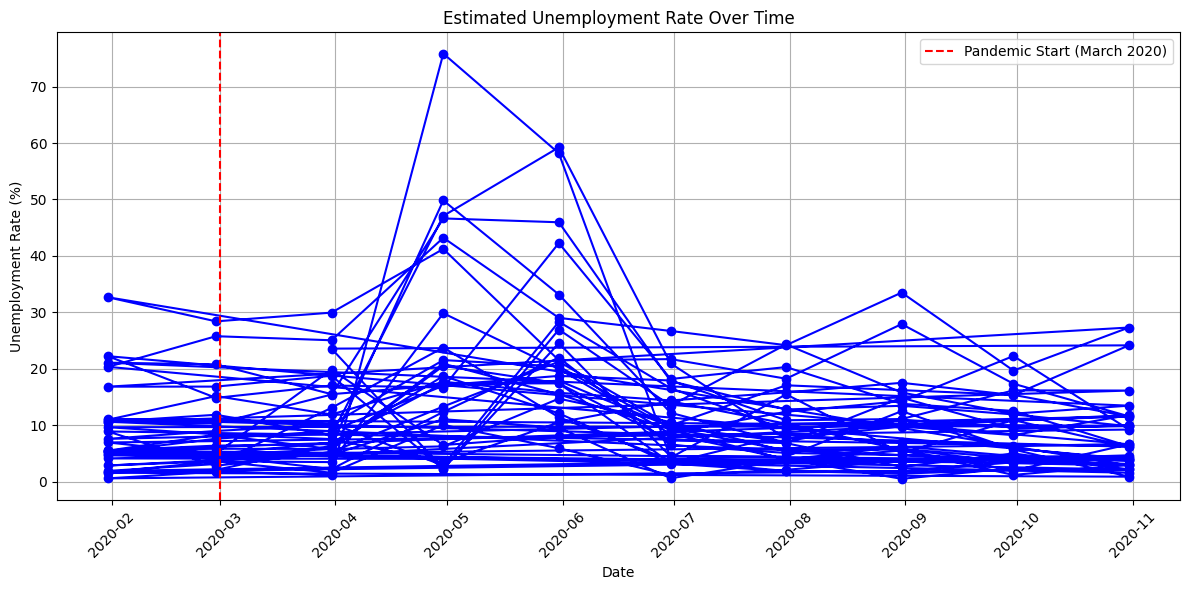

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Unemployment Rate'], marker='o', linestyle='-', color='b')
plt.axvline(x=pandemic_start_date, color='r', linestyle='--', label='Pandemic Start (March 2020)')
plt.title('Estimated Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


*6.2 Interactive Plot with Plotly*

In [11]:
import plotly.express as px

fig = px.line(df.reset_index(), x='Date', y='Unemployment Rate', color='Region', title='Estimated Unemployment Rate by Region')
fig.update_xaxes(tickangle=45)
fig.show()


7: Summary of Findings



In [12]:
print("Unemployment Analysis Summary:")
print("1. The overall trend in unemployment rates over time.")
print("2. The impact of the pandemic on unemployment rates, indicated by a significant change in the rates before and during the pandemic.")
print("3. Visual representation of the unemployment rates with a clear demarcation of the pandemic period.")


Unemployment Analysis Summary:
1. The overall trend in unemployment rates over time.
2. The impact of the pandemic on unemployment rates, indicated by a significant change in the rates before and during the pandemic.
3. Visual representation of the unemployment rates with a clear demarcation of the pandemic period.


8: State-wise Analysis

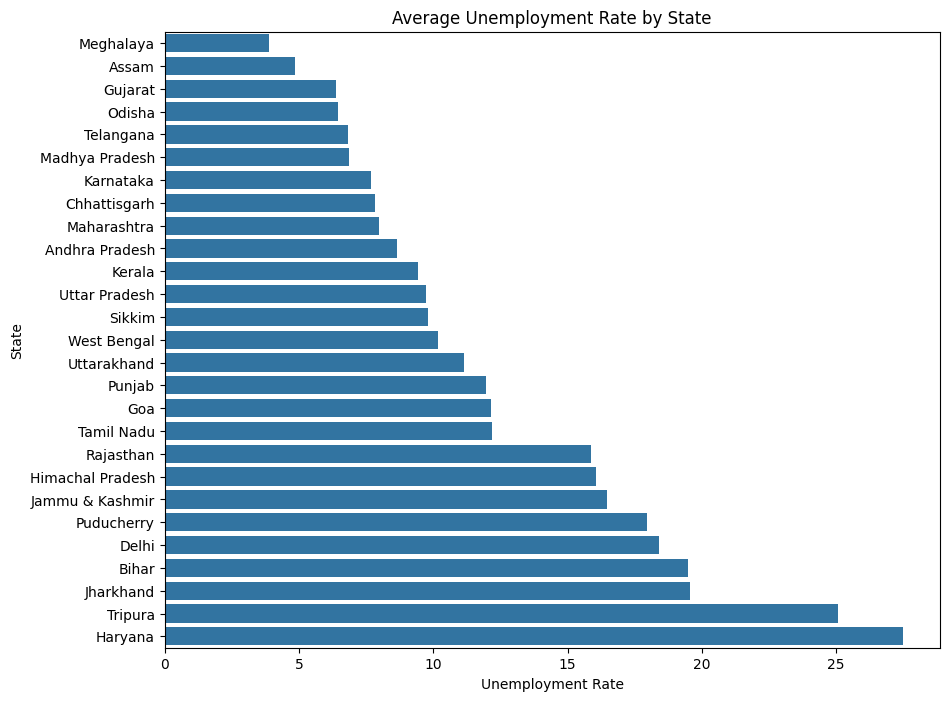

In [13]:
import seaborn as sns

# Assuming there's a 'Region' column representing states
statewise_data = df.groupby('Region')['Unemployment Rate'].mean().sort_values()

plt.figure(figsize=(10, 8))
sns.barplot(x=statewise_data.values, y=statewise_data.index)
plt.title('Average Unemployment Rate by State')
plt.xlabel('Unemployment Rate')
plt.ylabel('State')
plt.show()


9: Monthly Trend Analysis

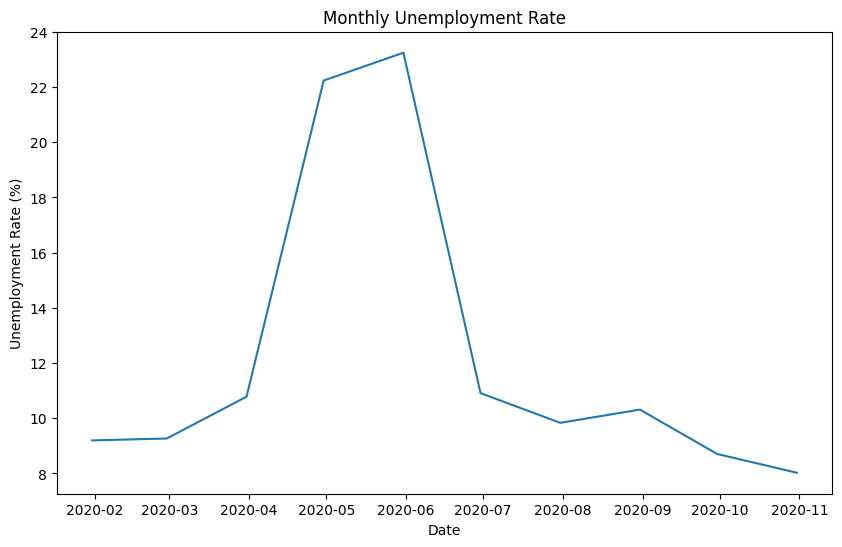

In [14]:
# Resample the data monthly and calculate the mean unemployment rate
monthly_data = df['Unemployment Rate'].resample('M').mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_data.index, y=monthly_data)
plt.title('Monthly Unemployment Rate')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.show()


10: Correlation Analysis

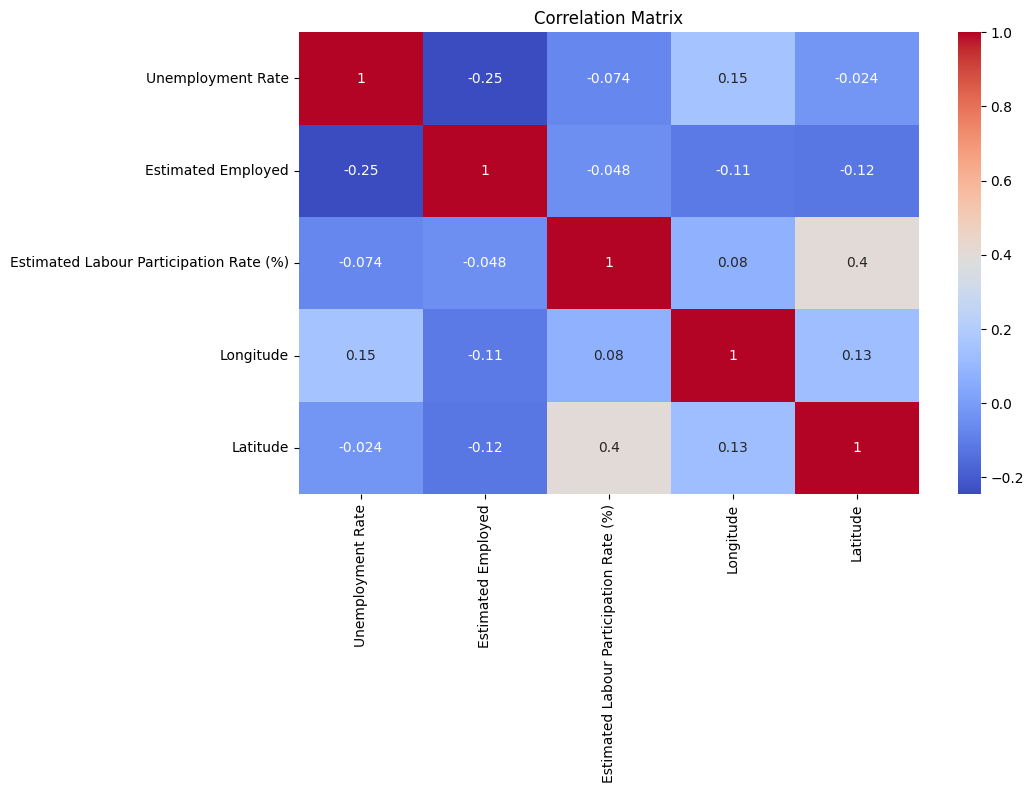

In [16]:
# Filter out non-numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])

# Plotting the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Time Series Forecasting

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                               SARIMAX Results                                
Dep. Variable:      Unemployment Rate   No. Observations:                   10
Model:                 ARIMA(5, 1, 0)   Log Likelihood                 -25.510
Date:                Thu, 20 Jun 2024   AIC                             63.020
Time:                        05:06:46   BIC                             64.204
Sample:                    01-31-2020   HQIC                            60.467
                         - 10-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0978      0.904     -0.108      0.914      -1.869       1.674
ar.L2         -0.5143      0.182     -2.819      0.005      -0.872      -0.157
ar.L3         -0.3378      1.084     -0.312      0.7

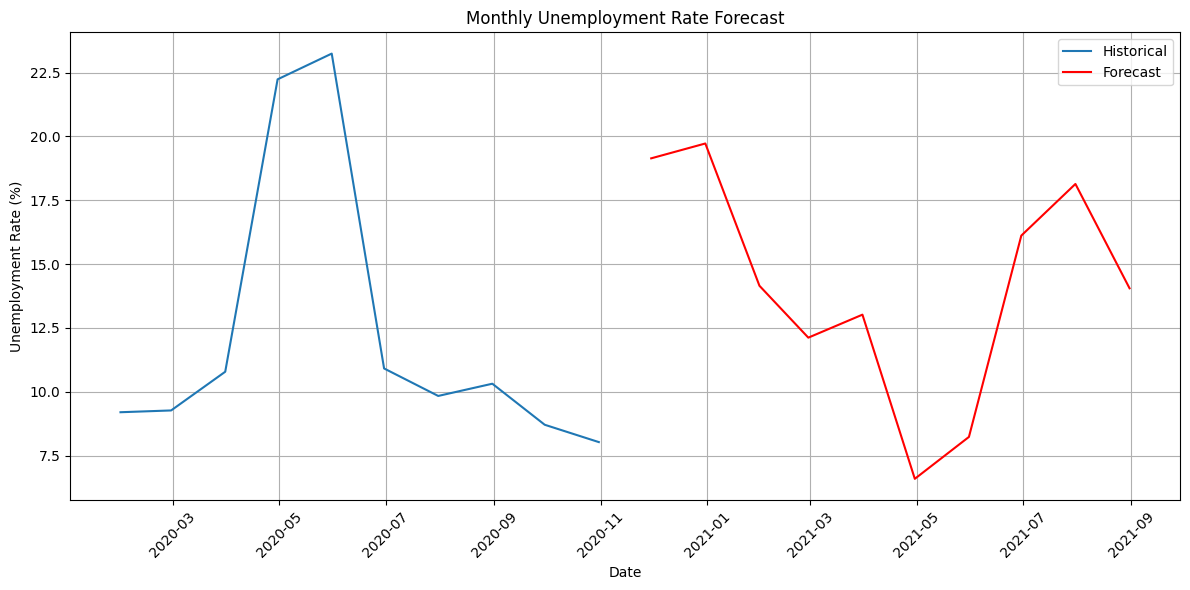

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import seaborn as sns

# Assuming the data is already loaded and cleaned in the DataFrame df
# Resample the data monthly and calculate the mean unemployment rate
monthly_data = df['Unemployment Rate'].resample('M').mean()

# Fit an ARIMA model (adjust p, d, q parameters as needed)
model = ARIMA(monthly_data, order=(5, 1, 0))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Forecasting for the next 10 months
forecast_steps = 10
forecast = model_fit.forecast(steps=forecast_steps)

# Plotting the forecast
plt.figure(figsize=(12, 6))
plt.plot(monthly_data, label='Historical')
plt.plot(forecast, label='Forecast', color='red')
plt.title('Monthly Unemployment Rate Forecast')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
